In [1]:
import streamlit as st
import plotly.express as px
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
datadf = pd.DataFrame(data)
datadf.head(16)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
datadf.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
datadf

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
datadf.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
datadf.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
datadf.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
data_copy = datadf.copy()
data_copy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
data_copy['Country'] = data_copy['Country'].str.replace("United Republic of Tanzania", "Tanzania")
data_copy['Country'] = data_copy['Country'].str.replace("Côte d'Ivoire", "Ivory Coast")
data_copy['Country'] = data_copy['Country'].str.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
data_copy['Country'] = data_copy['Country'].str.replace("Democratic People's Republic of Korea", "Korea, North")
data_copy['Country'] = data_copy['Country'].str.replace("Republic of Korea", "Korea, South")
data_copy['Country'] = data_copy['Country'].replace("Iran (Islamic Republic of)", "Iran")
data_copy['Country'] = data_copy['Country'].replace("Bolivia (Plurinational State of)", "Bolivia")
data_copy['Country'] = data_copy['Country'].replace("Venezuela (Bolivarian Republic of)", "Venezuela")
data_copy['Country'] = data_copy['Country'].str.replace("The former Yugoslav republic of Macedonia", "North Macedonia")
data_copy['Country'] = data_copy['Country'].str.replace("Lao People's Democratic Republic", "Laos")
data_copy['Country'] = data_copy['Country'].str.replace("Lao People's Democratic Republic", "Laos")
data_copy['Country'] = data_copy['Country'].str.replace("Timor-Leste", "Timor Leste")
data_copy['Country'] = data_copy['Country'].replace("Micronesia (Federated States of)", "Micronesia")





In [13]:
data_copy = data_copy[data_copy['Country'] != 'Cook Islands']
data_copy = data_copy[data_copy['Country'] != 'Niue']

In [16]:
data_copy['Country'] = data_copy['Country'].replace("Viet Nam", "Vietnam")


In [17]:
country_to_region = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Democratic Republic of the Congo': 'Africa',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'East Timor (Timor-Leste)': 'Asia',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Ivory Coast': 'Africa',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Korea, North': 'Asia',
    'Korea, South': 'Asia',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Republic of Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Swaziland': 'Africa',
    'Syrian Arab Republic': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Vatican City': 'Europe',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}
data_copy['Region'] = data_copy['Country'].map(country_to_region)
data_copy



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


In [18]:
data_kosong = data_copy['Region'].isnull()

# Menampilkan baris yang memiliki data kosong pada kolom tertentu
data_copy[data_kosong]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region


In [19]:
data_copypy = data_copy.copy()
data_copypy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


In [26]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data_copypy['Life expectancy ']=imputer.fit_transform(data_copypy[['Life expectancy ']])
data_copypy['Adult Mortality']=imputer.fit_transform(data_copypy[['Adult Mortality']])
data_copypy['Alcohol']=imputer.fit_transform(data_copypy[['Alcohol']])
data_copypy['Hepatitis B']=imputer.fit_transform(data_copypy[['Hepatitis B']])
data_copypy[' BMI ']=imputer.fit_transform(data_copypy[[' BMI ']])
data_copypy['Polio']=imputer.fit_transform(data_copypy[['Polio']])
data_copypy['Total expenditure']=imputer.fit_transform(data_copypy[['Total expenditure']])
data_copypy['Diphtheria ']=imputer.fit_transform(data_copypy[['Diphtheria ']])
data_copypy['GDP']=imputer.fit_transform(data_copypy[['GDP']])
data_copypy['Population']=imputer.fit_transform(data_copypy[['Population']])
data_copypy[' thinness  1-19 years']=imputer.fit_transform(data_copypy[[' thinness  1-19 years']])
data_copypy[' thinness 5-9 years']=imputer.fit_transform(data_copypy[[' thinness 5-9 years']])
data_copypy['Income composition of resources']=imputer.fit_transform(data_copypy[['Income composition of resources']])
data_copypy['Schooling']=imputer.fit_transform(data_copypy[['Schooling']])

In [27]:
data_copypy.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Region                             0
dtype: int64

In [29]:
region_column = data_copypy.pop('Region')
data_copypy.insert(data_copypy.columns.get_loc('Country') + 1, 'Region', region_column)

In [30]:
data_copy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2936.000000,2928.000000,2928.000000,2936.000000,2742.000000,2936.000000,2383.000000,2936.000000,2902.000000,2936.000000,2917.000000,2710.000000,2917.000000,2936.000000,2490.000000,2.286000e+03,2902.000000,2902.000000,2771.000000,2775.000000
mean,2007.514986,69.224932,164.796448,30.324591,4.606211,738.754191,80.925724,2421.240463,38.292488,42.064373,82.539253,5.938594,82.312993,1.743222,7483.158469,1.275338e+07,4.842970,4.873604,0.627551,11.992793
std,4.613193,9.523867,124.292079,117.964020,4.051991,1988.498610,25.075368,11471.004894,20.020833,160.496452,23.432350,2.498713,23.721255,5.079333,14270.169342,6.101210e+07,4.419965,4.508695,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.880000,4.768003,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.760000,65.268121,92.000000,17.000000,43.450000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.707500,441.977840,97.000000,361.250000,56.175000,28.000000,97.000000,7.497500,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [31]:
data_copypy.nunique()

Country                             191
Region                                6
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1245
percentage expenditure             2328
Hepatitis B                         164
Measles                             958
 BMI                                607
under-five deaths                   252
Polio                                75
Total expenditure                   993
Diphtheria                           83
 HIV/AIDS                           200
GDP                                2499
Population                         2280
 thinness  1-19 years               201
 thinness 5-9 years                 208
Income composition of resources     626
Schooling                           174
dtype: int64

In [32]:
data_copypy.corr()

C:\Users\PG 2017\AppData\Local\Temp\ipykernel_11756\1364198130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_copypy.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169704,-0.078899,-0.037226,-0.046396,0.031717,0.138150,-0.082363,0.106842,-0.042746,0.096876,0.081945,0.136432,-0.139552,0.093211,0.014606,-0.046759,-0.049808,0.236447,0.203569
Life expectancy,0.169704,1.000000,-0.696359,-0.196539,0.404327,0.381809,0.300004,-0.157576,0.560115,-0.222508,0.470534,0.225783,0.483722,-0.556477,0.436820,-0.019509,-0.472359,-0.466819,0.692483,0.715066
Adult Mortality,-0.078899,-0.696359,1.000000,0.078749,-0.197341,-0.242825,-0.175651,0.031175,-0.382039,0.094137,-0.280861,-0.123476,-0.280558,0.523746,-0.281959,-0.012705,0.299990,0.305493,-0.440062,-0.435108
infant deaths,-0.037226,-0.196539,0.078749,1.000000,-0.116129,-0.085683,-0.217406,0.501110,-0.227201,0.996629,-0.169497,-0.130065,-0.174148,0.025176,-0.106698,0.548585,0.465597,0.471235,-0.143666,-0.191762
Alcohol,-0.046396,0.404327,-0.197341,-0.116129,1.000000,0.330286,0.087218,-0.053823,0.329841,-0.112712,0.224096,0.300562,0.218325,-0.049344,0.328939,-0.030024,-0.431020,-0.420342,0.427897,0.512187
percentage expenditure,0.031717,0.381809,-0.242825,-0.085683,0.330286,1.000000,0.010787,-0.056653,0.229428,-0.087925,0.149077,0.172089,0.145358,-0.097947,0.889661,-0.024536,-0.251577,-0.253107,0.380391,0.388123
Hepatitis B,0.138150,0.300004,-0.175651,-0.217406,0.087218,0.010787,1.000000,-0.136514,0.180722,-0.227864,0.500459,0.095761,0.595603,-0.129091,0.065561,-0.095223,-0.136189,-0.138451,0.215919,0.263700
Measles,-0.082363,-0.157576,0.031175,0.501110,-0.053823,-0.056653,-0.136514,1.000000,-0.175890,0.507791,-0.133969,-0.104876,-0.139925,0.030854,-0.067708,0.236304,0.224679,0.220942,-0.115766,-0.122610
BMI,0.106842,0.560115,-0.382039,-0.227201,0.329841,0.229428,0.180722,-0.175890,1.000000,-0.237577,0.281029,0.241594,0.280169,-0.243461,0.279319,-0.063063,-0.531494,-0.538408,0.480585,0.508908
under-five deaths,-0.042746,-0.222508,0.094137,0.996629,-0.112712,-0.087925,-0.227864,0.507791,-0.237577,1.000000,-0.187633,-0.131689,-0.194737,0.038006,-0.110414,0.535929,0.467631,0.472103,-0.161537,-0.207116


C:\Users\PG 2017\AppData\Local\Temp\ipykernel_11756\3607546697.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data_copypy.corr(), annot = True)


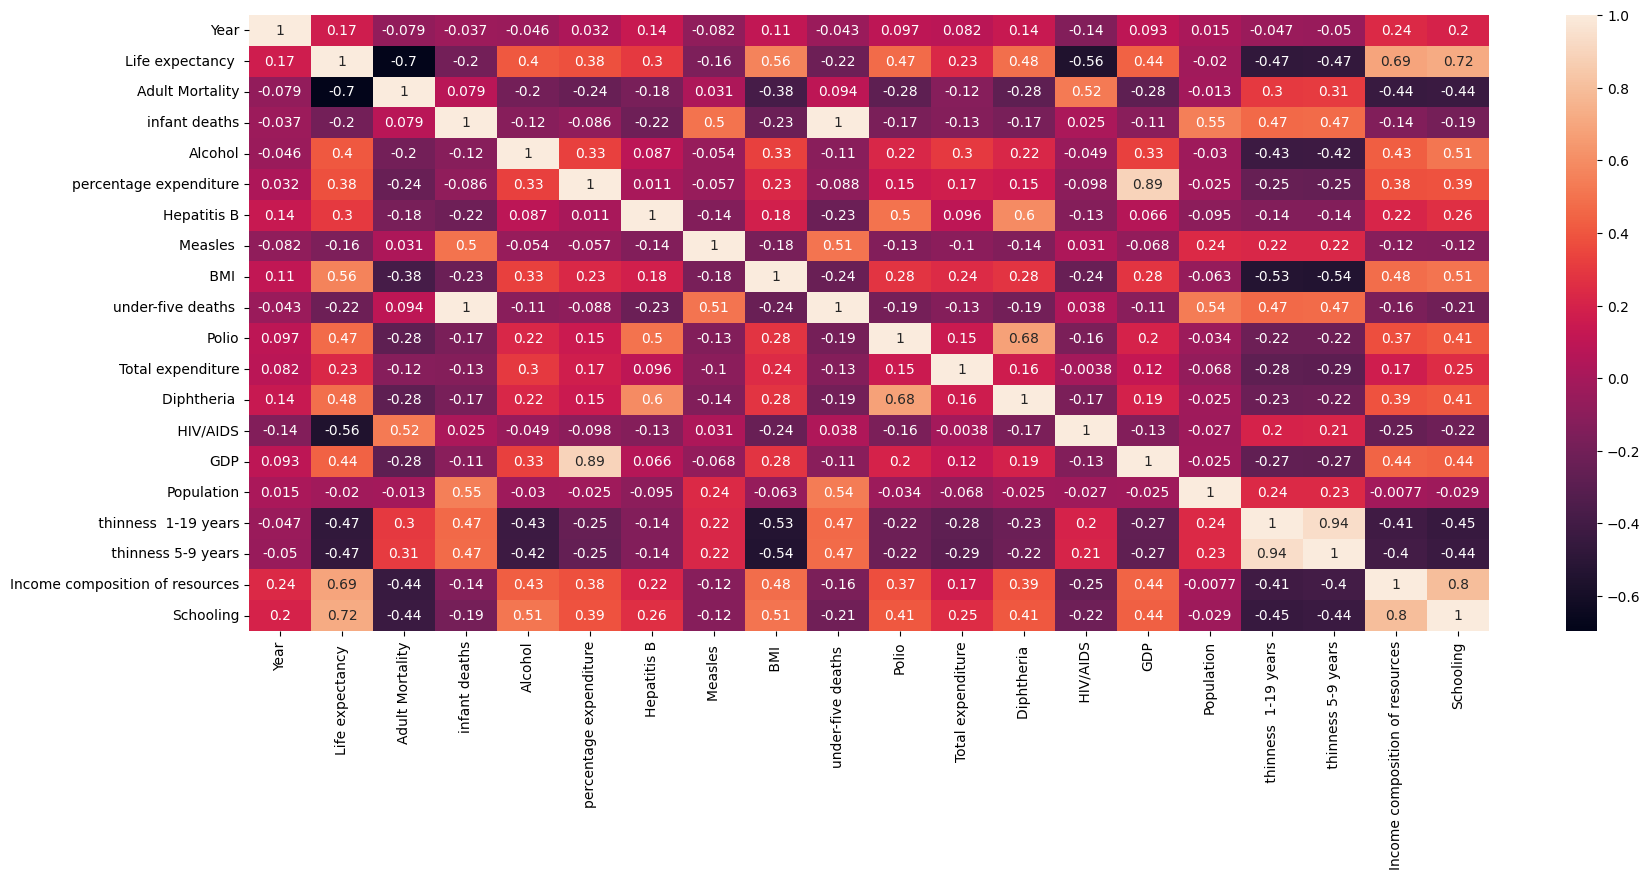

In [34]:
sb.heatmap(data_copypy.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

In [35]:
data_copypy.groupby('Region').mean()

C:\Users\PG 2017\AppData\Local\Temp\ipykernel_11756\1147057282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_copypy.groupby('Region').mean()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Region,,,,,,,,,,,,,,,,,,,,
Africa,2007.500000,58.611921,266.571759,44.246528,2.688197,108.679071,70.959978,4102.025463,23.732361,67.796296,70.673611,5.349259,69.743056,5.425347,2186.258751,9.133990e+06,7.168721,7.101106,0.474816,9.417637
Asia,2007.500000,71.194681,133.437500,60.875000,2.129919,462.710091,83.329941,4259.010638,33.816090,78.327128,85.602964,4.799752,85.985942,0.154787,7288.700443,2.273713e+07,7.316223,7.560638,0.642563,11.762326
Europe,2007.517572,77.404712,98.226187,1.172524,9.505974,2108.249489,82.432387,493.726837,52.727612,1.402556,93.488498,7.253537,92.706070,0.115335,16242.635734,9.046639e+06,1.593428,1.599436,0.789010,14.951353
North America,2007.532544,73.751923,126.347908,5.621302,6.084657,536.289184,81.105374,17.363905,45.005030,6.872781,85.500000,6.762690,87.624260,0.465089,6180.594501,8.100749e+06,2.817456,2.777219,0.655739,12.410014
Oceania,2007.634146,71.165852,135.812108,1.134146,2.899435,936.652756,72.971951,256.506098,55.455488,1.475610,77.890244,6.592159,74.067073,0.204268,6746.792484,3.683723e+06,0.975000,0.924390,0.616553,12.807927
South America,2007.500000,72.971875,139.119792,11.489583,5.782111,377.524082,82.874341,25.140625,47.804167,13.437500,84.640625,6.490833,86.156250,0.267187,4841.461172,1.767534e+07,2.154688,2.064583,0.689406,13.406771


In [36]:
data_copypy[data_copypy['Region'].str.contains('Oceania')]

,Country,Region,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,Oceania,2015,Developed,82.8,59.0,1,10.155333,0.000000,93.0,...,93.0,8.836667,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
113,Australia,Oceania,2014,Developed,82.7,6.0,1,9.710000,10769.363050,91.0,...,92.0,9.420000,92.0,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
114,Australia,Oceania,2013,Developed,82.5,61.0,1,9.870000,11734.853810,91.0,...,91.0,9.360000,91.0,0.1,67792.338600,23117353.0,0.6,0.6,0.933,20.3
115,Australia,Oceania,2012,Developed,82.3,61.0,1,10.030000,11714.998580,91.0,...,92.0,9.360000,92.0,0.1,67677.634770,22728254.0,0.6,0.6,0.930,20.1
116,Australia,Oceania,2011,Developed,82.0,63.0,1,10.300000,10986.265270,92.0,...,92.0,9.200000,92.0,0.1,62245.129000,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Vanuatu,Oceania,2004,Developing,69.6,169.0,0,0.850000,334.167337,63.0,...,67.0,4.120000,69.0,0.1,1787.947230,24143.0,1.6,1.5,0.000,10.7
2854,Vanuatu,Oceania,2003,Developing,69.4,173.0,0,1.200000,27.298391,64.0,...,67.0,4.200000,69.0,0.1,158.527240,198964.0,1.6,1.6,0.000,10.4
2855,Vanuatu,Oceania,2002,Developing,69.3,176.0,0,1.240000,171.137361,66.0,...,67.0,3.520000,7.0,0.1,1353.934819,193956.0,1.7,1.6,0.000,10.2
2856,Vanuatu,Oceania,2001,Developing,69.1,179.0,0,0.910000,163.105292,68.0,...,67.0,3.370000,7.0,0.1,1362.617310,18929.0,1.7,1.6,0.000,10.1


In [ ]:
data_copypy.to_csv('Life_Expectancy_Data_Fix.csv', index=False)


In [37]:
dataaaaaa = pd.read_csv("Life_Expectancy_Data_Fix.csv")
dataaaaaa

,Country,Region,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,Zimbabwe,Africa,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2932,Zimbabwe,Africa,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2933,Zimbabwe,Africa,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2934,Zimbabwe,Africa,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [56]:
# Filter data untuk tahun 2013
data_2013 = data_copypy[data_copypy['Year'] == 2001]

# Menggunakan groupby untuk mengelompokkan data berdasarkan kolom Region dan menjumlahkan Life Expectancy
result = data_2013.groupby('Region')['Life expectancy '].mean()

# Menampilkan hasil
print("Total Life Expectancy per Region in 2013:")
print(result)

Total Life Expectancy per Region in 2013:
Region
Africa           55.207407
Asia             69.676596
Europe           75.492308
North America    72.885714
Oceania          69.890000
South America    71.241667
Name: Life expectancy , dtype: float64
